![pandas](figures/pandas_logo.png)

*pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.*

## Data Strucures

Python provides some high-performance data structures

- arrays of arbitrary objects (`list`)
- key-value pairs, (`dict`)
- records (`tuple`)
- unique items (`set`)

The scientific python community does use these, but relies on 3rd-party packages to provide

1. N-Dimensional array (`numpy.ndarray`)
2. Labeled, heteroguenous, tabular data (`pandas.DataFrame`)

## Comparing pandas and dyplr

Pandas is focused on the data wrangling side of analysis. It leaves statistics to other packages like statsmodels, scikit-learn, PyMC3, and others.

The rest of this notebook runs through the [Introduction to dplyr](https://cran.rstudio.com/web/packages/dplyr/vignettes/introduction.html), showing the R and equivalent pandas code.
To preview the differences you'll see:

- Pandas uses methods, where dplyr uses functions
- Pandas uses `lambda`s or string literals, where dplyr / R use [Non-standard evaluation](http://adv-r.had.co.nz/Computing-on-the-language.html)
- The biggest difference is pandas use of row / column labels for alignment
- Both are great

In [24]:
%load_ext rpy2.ipython

In [25]:
%%R
library(dplyr)
library(nycflights13)
library(feather)

/Users/taugspurger/miniconda3/envs/ia-rug/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching package: ‘dplyr’


  warnings.warn(x, RRuntimeWarning)
/Users/taugspurger/miniconda3/envs/ia-rug/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  warnings.warn(x, RRuntimeWarning)
/Users/taugspurger/miniconda3/envs/ia-rug/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  warnings.warn(x, RRuntimeWarning)


In [26]:
%R head(flights)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1,2013,1,1,517,515,2.0,830,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400.0,5.0,15.0,1.357016e+09
2,2013,1,1,533,529,4.0,850,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416.0,5.0,29.0,1.357016e+09
3,2013,1,1,542,540,2.0,923,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089.0,5.0,40.0,1.357016e+09
4,2013,1,1,544,545,-1.0,1004,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576.0,5.0,45.0,1.357016e+09
5,2013,1,1,554,600,-6.0,812,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762.0,6.0,0.0,1.357020e+09
6,2013,1,1,554,558,-4.0,740,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719.0,5.0,58.0,1.357016e+09


In [27]:
%%R
write_feather(flights, "flights.feather")

In [28]:
%matplotlib inline

In [29]:
import pandas as pd
import feather

pd.options.display.max_rows = 10

In [30]:
flights = feather.read_dataframe("flights.feather")
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400.0,5.0,15.0,2013-01-01 05:00:00+00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416.0,5.0,29.0,2013-01-01 05:00:00+00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089.0,5.0,40.0,2013-01-01 05:00:00+00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576.0,5.0,45.0,2013-01-01 05:00:00+00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762.0,6.0,0.0,2013-01-01 06:00:00+00:00


## Filter Rows

In [8]:
%R filter(flights, month == 1, day == 1)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1,2013,1,1,517,515,2.0,830,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400.0,5.0,15.0,1.357016e+09
2,2013,1,1,533,529,4.0,850,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416.0,5.0,29.0,1.357016e+09
3,2013,1,1,542,540,2.0,923,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089.0,5.0,40.0,1.357016e+09
4,2013,1,1,544,545,-1.0,1004,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576.0,5.0,45.0,1.357016e+09
5,2013,1,1,554,600,-6.0,812,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762.0,6.0,0.0,1.357020e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,2013,1,1,2356,2359,-3.0,425,437,-12.0,B6,727,N588JB,JFK,BQN,186.0,1576.0,23.0,59.0,1.357081e+09
839,2013,1,1,-2147483648,1630,NaN,-2147483648,1815,NaN,EV,4308,N18120,EWR,RDU,NaN,416.0,16.0,30.0,1.357056e+09
840,2013,1,1,-2147483648,1935,NaN,-2147483648,2240,NaN,AA,791,N3EHAA,LGA,DFW,NaN,1389.0,19.0,35.0,1.357067e+09
841,2013,1,1,-2147483648,1500,NaN,-2147483648,1825,NaN,AA,1925,N3EVAA,LGA,MIA,NaN,1096.0,15.0,0.0,1.357052e+09


In [41]:
flights[(flights.month == 1) & (flights.day == 1)]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400.0,5.0,15.0,2013-01-01 05:00:00+00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416.0,5.0,29.0,2013-01-01 05:00:00+00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089.0,5.0,40.0,2013-01-01 05:00:00+00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576.0,5.0,45.0,2013-01-01 05:00:00+00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762.0,6.0,0.0,2013-01-01 06:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,2013,1,1,2356.0,2359,-3.0,425.0,437,-12.0,B6,727,N588JB,JFK,BQN,186.0,1576.0,23.0,59.0,2013-01-01 23:00:00+00:00
838,2013,1,1,NaN,1630,NaN,NaN,1815,NaN,EV,4308,N18120,EWR,RDU,NaN,416.0,16.0,30.0,2013-01-01 16:00:00+00:00
839,2013,1,1,NaN,1935,NaN,NaN,2240,NaN,AA,791,N3EHAA,LGA,DFW,NaN,1389.0,19.0,35.0,2013-01-01 19:00:00+00:00
840,2013,1,1,NaN,1500,NaN,NaN,1825,NaN,AA,1925,N3EVAA,LGA,MIA,NaN,1096.0,15.0,0.0,2013-01-01 15:00:00+00:00


Alternatively, you can use `.query`

In [50]:
flights.query("month == 1 & day == 1")

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400.0,5.0,15.0,2013-01-01 05:00:00+00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416.0,5.0,29.0,2013-01-01 05:00:00+00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089.0,5.0,40.0,2013-01-01 05:00:00+00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576.0,5.0,45.0,2013-01-01 05:00:00+00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762.0,6.0,0.0,2013-01-01 06:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,2013,1,1,2356.0,2359,-3.0,425.0,437,-12.0,B6,727,N588JB,JFK,BQN,186.0,1576.0,23.0,59.0,2013-01-01 23:00:00+00:00
838,2013,1,1,NaN,1630,NaN,NaN,1815,NaN,EV,4308,N18120,EWR,RDU,NaN,416.0,16.0,30.0,2013-01-01 16:00:00+00:00
839,2013,1,1,NaN,1935,NaN,NaN,2240,NaN,AA,791,N3EHAA,LGA,DFW,NaN,1389.0,19.0,35.0,2013-01-01 19:00:00+00:00
840,2013,1,1,NaN,1500,NaN,NaN,1825,NaN,AA,1925,N3EVAA,LGA,MIA,NaN,1096.0,15.0,0.0,2013-01-01 15:00:00+00:00


## Arrange rows

In [51]:
%R arrange(flights, year, month, day)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1,2013,1,1,517,515,2.0,830,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400.0,5.0,15.0,1.357016e+09
2,2013,1,1,533,529,4.0,850,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416.0,5.0,29.0,1.357016e+09
3,2013,1,1,542,540,2.0,923,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089.0,5.0,40.0,1.357016e+09
4,2013,1,1,544,545,-1.0,1004,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576.0,5.0,45.0,1.357016e+09
5,2013,1,1,554,600,-6.0,812,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762.0,6.0,0.0,1.357020e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336772,2013,12,31,-2147483648,705,NaN,-2147483648,931,NaN,UA,1729,NA,EWR,DEN,NaN,1605.0,7.0,5.0,1.388473e+09
336773,2013,12,31,-2147483648,825,NaN,-2147483648,1029,NaN,US,1831,NA,JFK,CLT,NaN,541.0,8.0,25.0,1.388477e+09
336774,2013,12,31,-2147483648,1615,NaN,-2147483648,1800,NaN,MQ,3301,N844MQ,LGA,RDU,NaN,431.0,16.0,15.0,1.388506e+09
336775,2013,12,31,-2147483648,600,NaN,-2147483648,735,NaN,UA,219,NA,EWR,ORD,NaN,719.0,6.0,0.0,1.388470e+09


In [52]:
flights.sort_values(["year", "month", "day"])

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400.0,5.0,15.0,2013-01-01 05:00:00+00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416.0,5.0,29.0,2013-01-01 05:00:00+00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089.0,5.0,40.0,2013-01-01 05:00:00+00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576.0,5.0,45.0,2013-01-01 05:00:00+00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762.0,6.0,0.0,2013-01-01 06:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111291,2013,12,31,NaN,705,NaN,NaN,931,NaN,UA,1729,None,EWR,DEN,NaN,1605.0,7.0,5.0,2013-12-31 07:00:00+00:00
111292,2013,12,31,NaN,825,NaN,NaN,1029,NaN,US,1831,None,JFK,CLT,NaN,541.0,8.0,25.0,2013-12-31 08:00:00+00:00
111293,2013,12,31,NaN,1615,NaN,NaN,1800,NaN,MQ,3301,N844MQ,LGA,RDU,NaN,431.0,16.0,15.0,2013-12-31 16:00:00+00:00
111294,2013,12,31,NaN,600,NaN,NaN,735,NaN,UA,219,None,EWR,ORD,NaN,719.0,6.0,0.0,2013-12-31 06:00:00+00:00


## Select columns

In [53]:
%R select(flights, year, month, day)

,year,month,day
1,2013,1,1
2,2013,1,1
3,2013,1,1
4,2013,1,1
5,2013,1,1
...,...,...,...
336772,2013,9,30
336773,2013,9,30
336774,2013,9,30
336775,2013,9,30


In [54]:
flights[['year', 'month', 'day']]

,year,month,day
0,2013,1,1
1,2013,1,1
2,2013,1,1
3,2013,1,1
4,2013,1,1
...,...,...,...
336771,2013,9,30
336772,2013,9,30
336773,2013,9,30
336774,2013,9,30


## Extract distinct (unique) rows

In [55]:
%R distinct(flights, tailnum)

,tailnum
1,N14228
2,N24211
3,N619AA
4,N804JB
5,N668DN
...,...
4040,N766SK
4041,N772SK
4042,N776SK
4043,N785SK


In [56]:
flights.tailnum.drop_duplicates()

0         N14228
1         N24211
2         N619AA
3         N804JB
4         N668DN
           ...  
327436    N766SK
329041    N772SK
330033    N776SK
331007    N785SK
334259    N557AS
Name: tailnum, Length: 4044, dtype: object

## Add new columns

In [57]:
%%R
mutate(flights,
  gain = arr_delay - dep_delay,
  speed = distance / air_time * 60)

# A tibble: 336,776 x 21
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      533            529         4      850            830
 3  2013     1     1      542            540         2      923            850
 4  2013     1     1      544            545        -1     1004           1022
 5  2013     1     1      554            600        -6      812            837
 6  2013     1     1      554            558        -4      740            728
 7  2013     1     1      555            600        -5      913            854
 8  2013     1     1      557            600        -3      709            723
 9  2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753            745
# ... with 336,766 more row

In [58]:
flights.assign(
    gain=flights.arr_delay - flights.dep_delay,
    speed=flights.distance / flights.air_time * 60
)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,gain,speed
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,N14228,EWR,IAH,227.0,1400.0,5.0,15.0,2013-01-01 05:00:00+00:00,9.0,370.044053
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,N24211,LGA,IAH,227.0,1416.0,5.0,29.0,2013-01-01 05:00:00+00:00,16.0,374.273128
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,N619AA,JFK,MIA,160.0,1089.0,5.0,40.0,2013-01-01 05:00:00+00:00,31.0,408.375000
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,N804JB,JFK,BQN,183.0,1576.0,5.0,45.0,2013-01-01 05:00:00+00:00,-17.0,516.721311
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,N668DN,LGA,ATL,116.0,762.0,6.0,0.0,2013-01-01 06:00:00+00:00,-19.0,394.137931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,...,None,JFK,DCA,NaN,213.0,14.0,55.0,2013-09-30 14:00:00+00:00,NaN,NaN
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,...,None,LGA,SYR,NaN,198.0,22.0,0.0,2013-09-30 22:00:00+00:00,NaN,NaN
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,...,N535MQ,LGA,BNA,NaN,764.0,12.0,10.0,2013-09-30 12:00:00+00:00,NaN,NaN
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,...,N511MQ,LGA,CLE,NaN,419.0,11.0,59.0,2013-09-30 11:00:00+00:00,NaN,NaN


R's NSE really shines here. Since the arguments aren't evaluated until inside the `mutate`, you can create
a new column and use it in the same `mutate`.

In [21]:
%%R
mutate(flights,
  gain = arr_delay - dep_delay,
  gain_per_hour = gain / (air_time / 60)
)

# A tibble: 336,776 x 21
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      533            529         4      850            830
 3  2013     1     1      542            540         2      923            850
 4  2013     1     1      544            545        -1     1004           1022
 5  2013     1     1      554            600        -6      812            837
 6  2013     1     1      554            558        -4      740            728
 7  2013     1     1      555            600        -5      913            854
 8  2013     1     1      557            600        -3      709            723
 9  2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753            745
# ... with 336,766 more row

This would have to be done in two separate `.assign` calls with pandas.

It also enables makes using the pipe operator more elegant than in Python.

In [60]:
%%R
filter(flights, day==1) %>% mutate(
  gain = arr_delay - dep_delay,
  speed = distance / air_time * 60
)

# A tibble: 11,036 x 21
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      533            529         4      850            830
 3  2013     1     1      542            540         2      923            850
 4  2013     1     1      544            545        -1     1004           1022
 5  2013     1     1      554            600        -6      812            837
 6  2013     1     1      554            558        -4      740            728
 7  2013     1     1      555            600        -5      913            854
 8  2013     1     1      557            600        -3      709            723
 9  2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753            745
# ... with 11,026 more rows,

The typical pattern in pandas is to "delay" and argument's evaluation by wrapping it in a `lambda` (anonymous function). Notice the `lambda df:`, which defines a function that takes a single arugment, `df`.

In [23]:
flights[flights.day == 1].assign(
    gain = lambda df: df.arr_delay - df.dep_delay,
    speed = lambda df: df.distance / df.air_time * 60
)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,gain,speed
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,N14228,EWR,IAH,227.0,1400.0,5.0,15.0,2013-01-01 05:00:00+00:00,9.0,370.044053
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,N24211,LGA,IAH,227.0,1416.0,5.0,29.0,2013-01-01 05:00:00+00:00,16.0,374.273128
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,N619AA,JFK,MIA,160.0,1089.0,5.0,40.0,2013-01-01 05:00:00+00:00,31.0,408.375000
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,N804JB,JFK,BQN,183.0,1576.0,5.0,45.0,2013-01-01 05:00:00+00:00,-17.0,516.721311
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,N668DN,LGA,ATL,116.0,762.0,6.0,0.0,2013-01-01 06:00:00+00:00,-19.0,394.137931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309915,2013,9,1,2302.0,2305,-3.0,8.0,13,-5.0,B6,...,N629JB,JFK,BOS,42.0,187.0,23.0,5.0,2013-09-01 23:00:00+00:00,-2.0,267.142857
309916,2013,9,1,2329.0,2245,44.0,40.0,1,39.0,B6,...,N373JB,JFK,BTV,48.0,266.0,22.0,45.0,2013-09-01 22:00:00+00:00,-5.0,332.500000
309917,2013,9,1,2351.0,2359,-8.0,335.0,350,-15.0,B6,...,N588JB,JFK,PSE,204.0,1617.0,23.0,59.0,2013-09-01 23:00:00+00:00,-7.0,475.588235
309918,2013,9,1,2352.0,2359,-7.0,323.0,344,-21.0,B6,...,N768JB,JFK,SJU,196.0,1598.0,23.0,59.0,2013-09-01 23:00:00+00:00,-14.0,489.183673


## Summarise values

In [24]:
%%R
summarise(flights,
  delay = mean(dep_delay, na.rm = TRUE))

# A tibble: 1 x 1
     delay
     <dbl>
1 12.63907


In [25]:
flights.aggregate({"dep_delay": "mean"}).rename({"dep_delay": "delay"})

delay    12.63907
dtype: float64

## Randomly sample rows

In [26]:
%R sample_n(flights, 10)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1,2013,12,1,656,700,-4.0,1005,1025,-20.0,VX,399,N642VA,JFK,LAX,338.0,2475.0,7.0,0.0,1.385881e+09
2,2013,9,26,1539,1545,-6.0,1841,1850,-9.0,UA,363,N832UA,EWR,FLL,151.0,1065.0,15.0,45.0,1.380208e+09
3,2013,1,14,1453,1500,-7.0,1803,1825,-22.0,AA,1925,N3EFAA,LGA,MIA,154.0,1096.0,15.0,0.0,1.358176e+09
4,2013,9,10,1542,1510,32.0,1659,1641,18.0,EV,4191,N15986,EWR,BNA,107.0,748.0,15.0,10.0,1.378825e+09
5,2013,8,3,1008,1014,-6.0,1120,1134,-14.0,EV,4240,N18102,EWR,BUF,49.0,282.0,10.0,14.0,1.375524e+09
6,2013,4,2,1111,1100,11.0,1306,1305,1.0,DL,1573,N302NB,LGA,MEM,155.0,963.0,11.0,0.0,1.364900e+09
7,2013,3,6,1959,1935,24.0,2245,2235,10.0,DL,1485,N934DL,LGA,MCO,122.0,950.0,19.0,35.0,1.362596e+09
8,2013,11,19,1214,1135,39.0,1610,1511,59.0,UA,1120,N33209,EWR,SFO,367.0,2565.0,11.0,35.0,1.384859e+09
9,2013,3,5,1859,1905,-6.0,2146,2217,-31.0,UA,1471,N18243,EWR,RSW,149.0,1068.0,19.0,5.0,1.362510e+09
10,2013,5,16,1245,1245,0.0,1444,1525,-41.0,WN,2497,N750SA,LGA,DEN,224.0,1620.0,12.0,45.0,1.368706e+09


In [27]:
flights.sample(n=10)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
222125,2013,5,31,2040.0,2025,15.0,2316.0,2333,-17.0,UA,771,N525UA,JFK,LAX,313.0,2475.0,20.0,25.0,2013-05-31 20:00:00+00:00
199169,2013,5,7,825.0,829,-4.0,1111.0,1114,-3.0,B6,483,N806JB,JFK,MCO,131.0,944.0,8.0,29.0,2013-05-07 08:00:00+00:00
4589,2013,1,6,1119.0,1118,1.0,1330.0,1334,-4.0,EV,4279,N16112,EWR,MCI,173.0,1092.0,11.0,18.0,2013-01-06 11:00:00+00:00
115890,2013,2,6,1139.0,1140,-1.0,1423.0,1445,-22.0,AA,1623,N3GWAA,EWR,MIA,145.0,1085.0,11.0,40.0,2013-02-06 11:00:00+00:00
151133,2013,3,17,657.0,700,-3.0,1043.0,1044,-1.0,DL,1865,N706TW,JFK,SFO,379.0,2586.0,7.0,0.0,2013-03-17 07:00:00+00:00
260355,2013,7,11,1759.0,1800,-1.0,1912.0,1915,-3.0,US,2185,N711UW,LGA,DCA,40.0,214.0,18.0,0.0,2013-07-11 18:00:00+00:00
73395,2013,11,19,2048.0,2100,-12.0,2212.0,2235,-23.0,MQ,3317,N9EAMQ,LGA,RDU,64.0,431.0,21.0,0.0,2013-11-19 21:00:00+00:00
304396,2013,8,26,1738.0,1745,-7.0,1913.0,1925,-12.0,MQ,3301,N503MQ,LGA,RDU,69.0,431.0,17.0,45.0,2013-08-26 17:00:00+00:00
105827,2013,12,25,1845.0,1850,-5.0,2202.0,2220,-18.0,AA,235,N3GCAA,JFK,SEA,348.0,2422.0,18.0,50.0,2013-12-25 18:00:00+00:00
37069,2013,10,11,1625.0,1625,0.0,1927.0,1932,-5.0,B6,423,N593JB,JFK,LAX,325.0,2475.0,16.0,25.0,2013-10-11 16:00:00+00:00


In [61]:
%%R
by_tailnum <- group_by(flights, tailnum)
delay <- summarise(by_tailnum,
  count = n(),
  dist = mean(distance, na.rm = TRUE),
  delay = mean(arr_delay, na.rm = TRUE))
delay <- filter(delay, count > 20, dist < 2000)
delay

# A tibble: 2,962 x 4
   tailnum count     dist      delay
     <chr> <int>    <dbl>      <dbl>
 1  N0EGMQ   371 676.1887  9.9829545
 2  N10156   153 757.9477 12.7172414
 3  N102UW    48 535.8750  2.9375000
 4  N103US    46 535.1957 -6.9347826
 5  N104UW    47 535.2553  1.8043478
 6  N10575   289 519.7024 20.6914498
 7  N105UW    45 524.8444 -0.2666667
 8  N107US    41 528.7073 -5.7317073
 9  N108UW    60 534.5000 -1.2500000
10  N109UW    48 535.8750 -2.5208333
# ... with 2,952 more rows


In [29]:
by_tailnum = flights.groupby("tailnum")
delay = by_tailnum.aggregate({
    "year": "count",
    "distance": "mean",
    "arr_delay": "mean"
}).rename(columns={"year": "count", "distance": "dist",
                   "arr_delay": "delay"})
delay = delay[(delay['count'] > 20) & delay['dist'] < 2000]
delay

,count,dist,delay
tailnum,,,
D942DN,4,854.500000,31.500000
N0EGMQ,371,676.188679,9.982955
N10156,153,757.947712,12.717241
N102UW,48,535.875000,2.937500
N103US,46,535.195652,-6.934783
...,...,...,...
N997DL,63,867.761905,4.903226
N998AT,26,593.538462,29.960000
N998DL,77,857.818182,16.394737


## Chaining

In [30]:
%%R
flights %>%
  group_by(year, month, day) %>%
  select(arr_delay, dep_delay) %>%
  summarise(
    arr = mean(arr_delay, na.rm = TRUE),
    dep = mean(dep_delay, na.rm = TRUE)
  ) %>%
  filter(arr > 30 | dep > 30)

/Users/taugspurger/miniconda3/envs/ia-rug/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Adding missing grouping variables: `year`, `month`, `day`

  warnings.warn(x, RRuntimeWarning)


Source: local data frame [49 x 5]
Groups: year, month [11]

# A tibble: 49 x 5
    year month   day      arr      dep
   <int> <int> <int>    <dbl>    <dbl>
 1  2013     1    16 34.24736 24.61287
 2  2013     1    31 32.60285 28.65836
 3  2013     2    11 36.29009 39.07360
 4  2013     2    27 31.25249 37.76327
 5  2013     3     8 85.86216 83.53692
 6  2013     3    18 41.29189 30.11796
 7  2013     4    10 38.41231 33.02368
 8  2013     4    12 36.04814 34.83843
 9  2013     4    18 36.02848 34.91536
10  2013     4    19 47.91170 46.12783
# ... with 39 more rows


In [31]:
(flights.groupby(['year', 'month', 'day'])
 [['arr_delay', 'dep_delay']]
 .mean()
 .rename(columns=lambda x: x.split('_')[0])
 .loc[lambda x: (x.arr > 30) | (x.dep > 30)]
)

arr        dep
year month day                      
2013 1     16   34.247362  24.612865
           31   32.602854  28.658363
     2     11   36.290094  39.073598
           27   31.252492  37.763274
     3     8    85.862155  83.536921
...                   ...        ...
     12    9    42.575556  34.800221
           10   44.508796  26.465494
           14   46.397504  28.361552
           17   55.871856  40.705602
           23   32.226042  32.254149

[49 rows x 2 columns]

## Automatic Alignment

Let's grab some series from FRED on state population and GDP

In [32]:
import json

from pandas_datareader.data import DataReader
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('default')

I did this earlier, in case the internet was flaky

```python
with open("data/states.json") as f:
    states = json.load(f)

gdp_series = [f'{state}RGSP' for state in states]
pop_series = [f'{state}POP' for state in states]

gdp = DataReader(gdp_series, data_source="fred", start="1997-01-01")
gdp.to_csv("data/gdp.csv")

pop = DataReader(pop_series, data_source="fred", start="1900-01-01")
pop.to_csv("data/pop.csv")
```

In [39]:
gdp = pd.read_csv('data/gdp.csv', index_col='DATE', parse_dates=['DATE'])
pop = pd.read_csv('data/pop.csv', index_col='DATE', parse_dates=['DATE'])
gdp.head()

,AKRGSP,ALRGSP,ARRGSP,AZRGSP,CARGSP,CORGSP,CTRGSP,DCRGSP,DERGSP,FLRGSP,...,SDRGSP,TNRGSP,TXRGSP,UTRGSP,VARGSP,VTRGSP,WARGSP,WIRGSP,WVRGSP,WYRGSP
DATE,,,,,,,,,,,,,,,,,,,,,
1997-01-01,37880,137143,79164,163114,1343127,175029,183342,74610,43065,537176,...,22910,202976,816575,75322,294126,19545,259637,203610,55382,22801
1998-01-01,36889,141672,80136,177319,1421713,192216,189859,75778,47120,569488,...,24204,213093,866952,80085,308784,20122,275275,210292,56244,23387
1999-01-01,36617,146666,84533,192410,1525588,207243,195476,78951,51765,597492,...,25195,219514,900960,83918,323570,21216,295582,218921,58355,24284
2000-01-01,35909,148188,85271,202215,1638988,222942,209329,79302,54253,623599,...,26909,221830,930610,86850,336195,22326,295895,225228,58084,25118
2001-01-01,37102,148824,85283,206560,1627983,226211,212395,83072,56618,645193,...,27535,222160,954786,88719,346918,23031,289754,227508,58120,26542


In [42]:
pop.head()

,AKPOP,ALPOP,ARPOP,AZPOP,CAPOP,COPOP,CTPOP,DCPOP,DEPOP,FLPOP,...,SDPOP,TNPOP,TXPOP,UTPOP,VAPOP,VTPOP,WAPOP,WIPOP,WVPOP,WYPOP
DATE,,,,,,,,,,,,,,,,,,,,,
1900-01-01,NaN,1830.0,1314.0,124.0,1490.0,543.0,910.0,278.0,185.0,530.0,...,403.0,2023.0,3055.0,277.0,1858.0,344.0,523.0,2072.0,959.0,93.0
1901-01-01,NaN,1907.0,1341.0,131.0,1550.0,581.0,931.0,285.0,187.0,544.0,...,418.0,2041.0,3132.0,284.0,1887.0,347.0,583.0,2109.0,972.0,100.0
1902-01-01,NaN,1935.0,1360.0,138.0,1623.0,621.0,952.0,290.0,188.0,565.0,...,431.0,2060.0,3210.0,292.0,1894.0,349.0,651.0,2141.0,1000.0,105.0
1903-01-01,NaN,1957.0,1384.0,144.0,1702.0,652.0,972.0,295.0,190.0,587.0,...,437.0,2082.0,3291.0,299.0,1890.0,350.0,719.0,2171.0,1037.0,108.0
1904-01-01,NaN,1978.0,1419.0,151.0,1792.0,659.0,987.0,302.0,192.0,599.0,...,452.0,2086.0,3374.0,308.0,1889.0,353.0,782.0,2202.0,1064.0,111.0


In [44]:
gdp.index

DatetimeIndex(['1997-01-01', '1998-01-01', '1999-01-01', '2000-01-01',
               '2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
               '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01',
               '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01'],
              dtype='datetime64[ns]', name='DATE', freq=None)

In [45]:
pop.index

DatetimeIndex(['1900-01-01', '1901-01-01', '1902-01-01', '1903-01-01',
               '1904-01-01', '1905-01-01', '1906-01-01', '1907-01-01',
               '1908-01-01', '1909-01-01',
               ...
               '2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01',
               '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01'],
              dtype='datetime64[ns]', name='DATE', length=117, freq=None)

In [57]:
%matplotlib inline

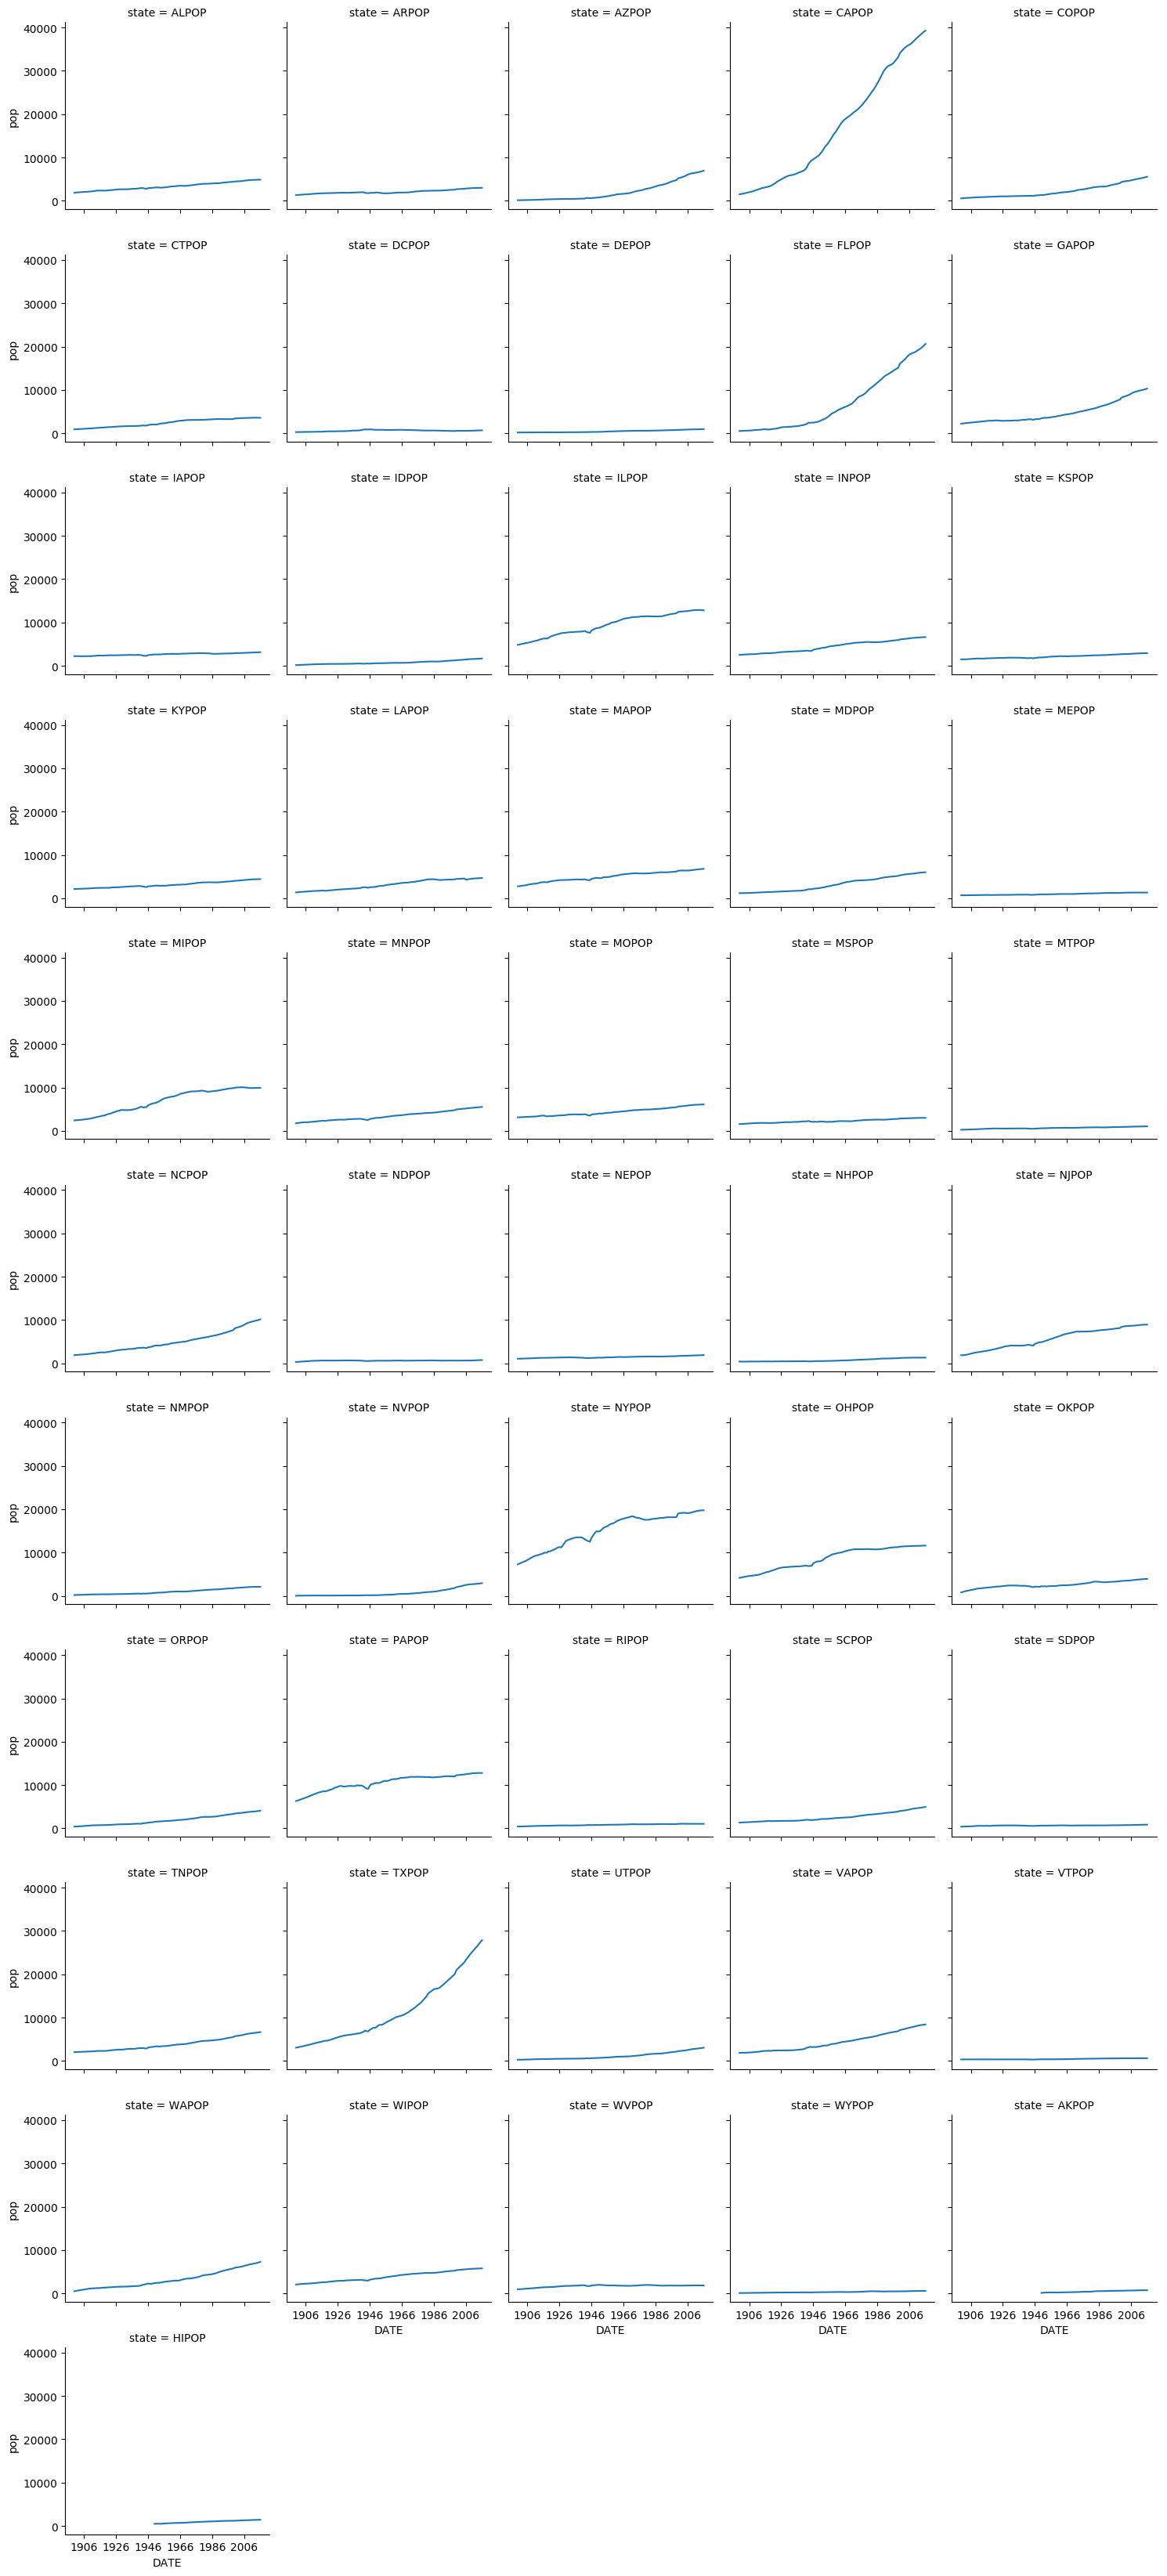

In [60]:
g = sns.FacetGrid(pop.rename_axis("state", axis=1).stack().rename("pop").reset_index(),
                  col="state", col_wrap=5)
g.map(plt.plot, 'DATE', 'pop');

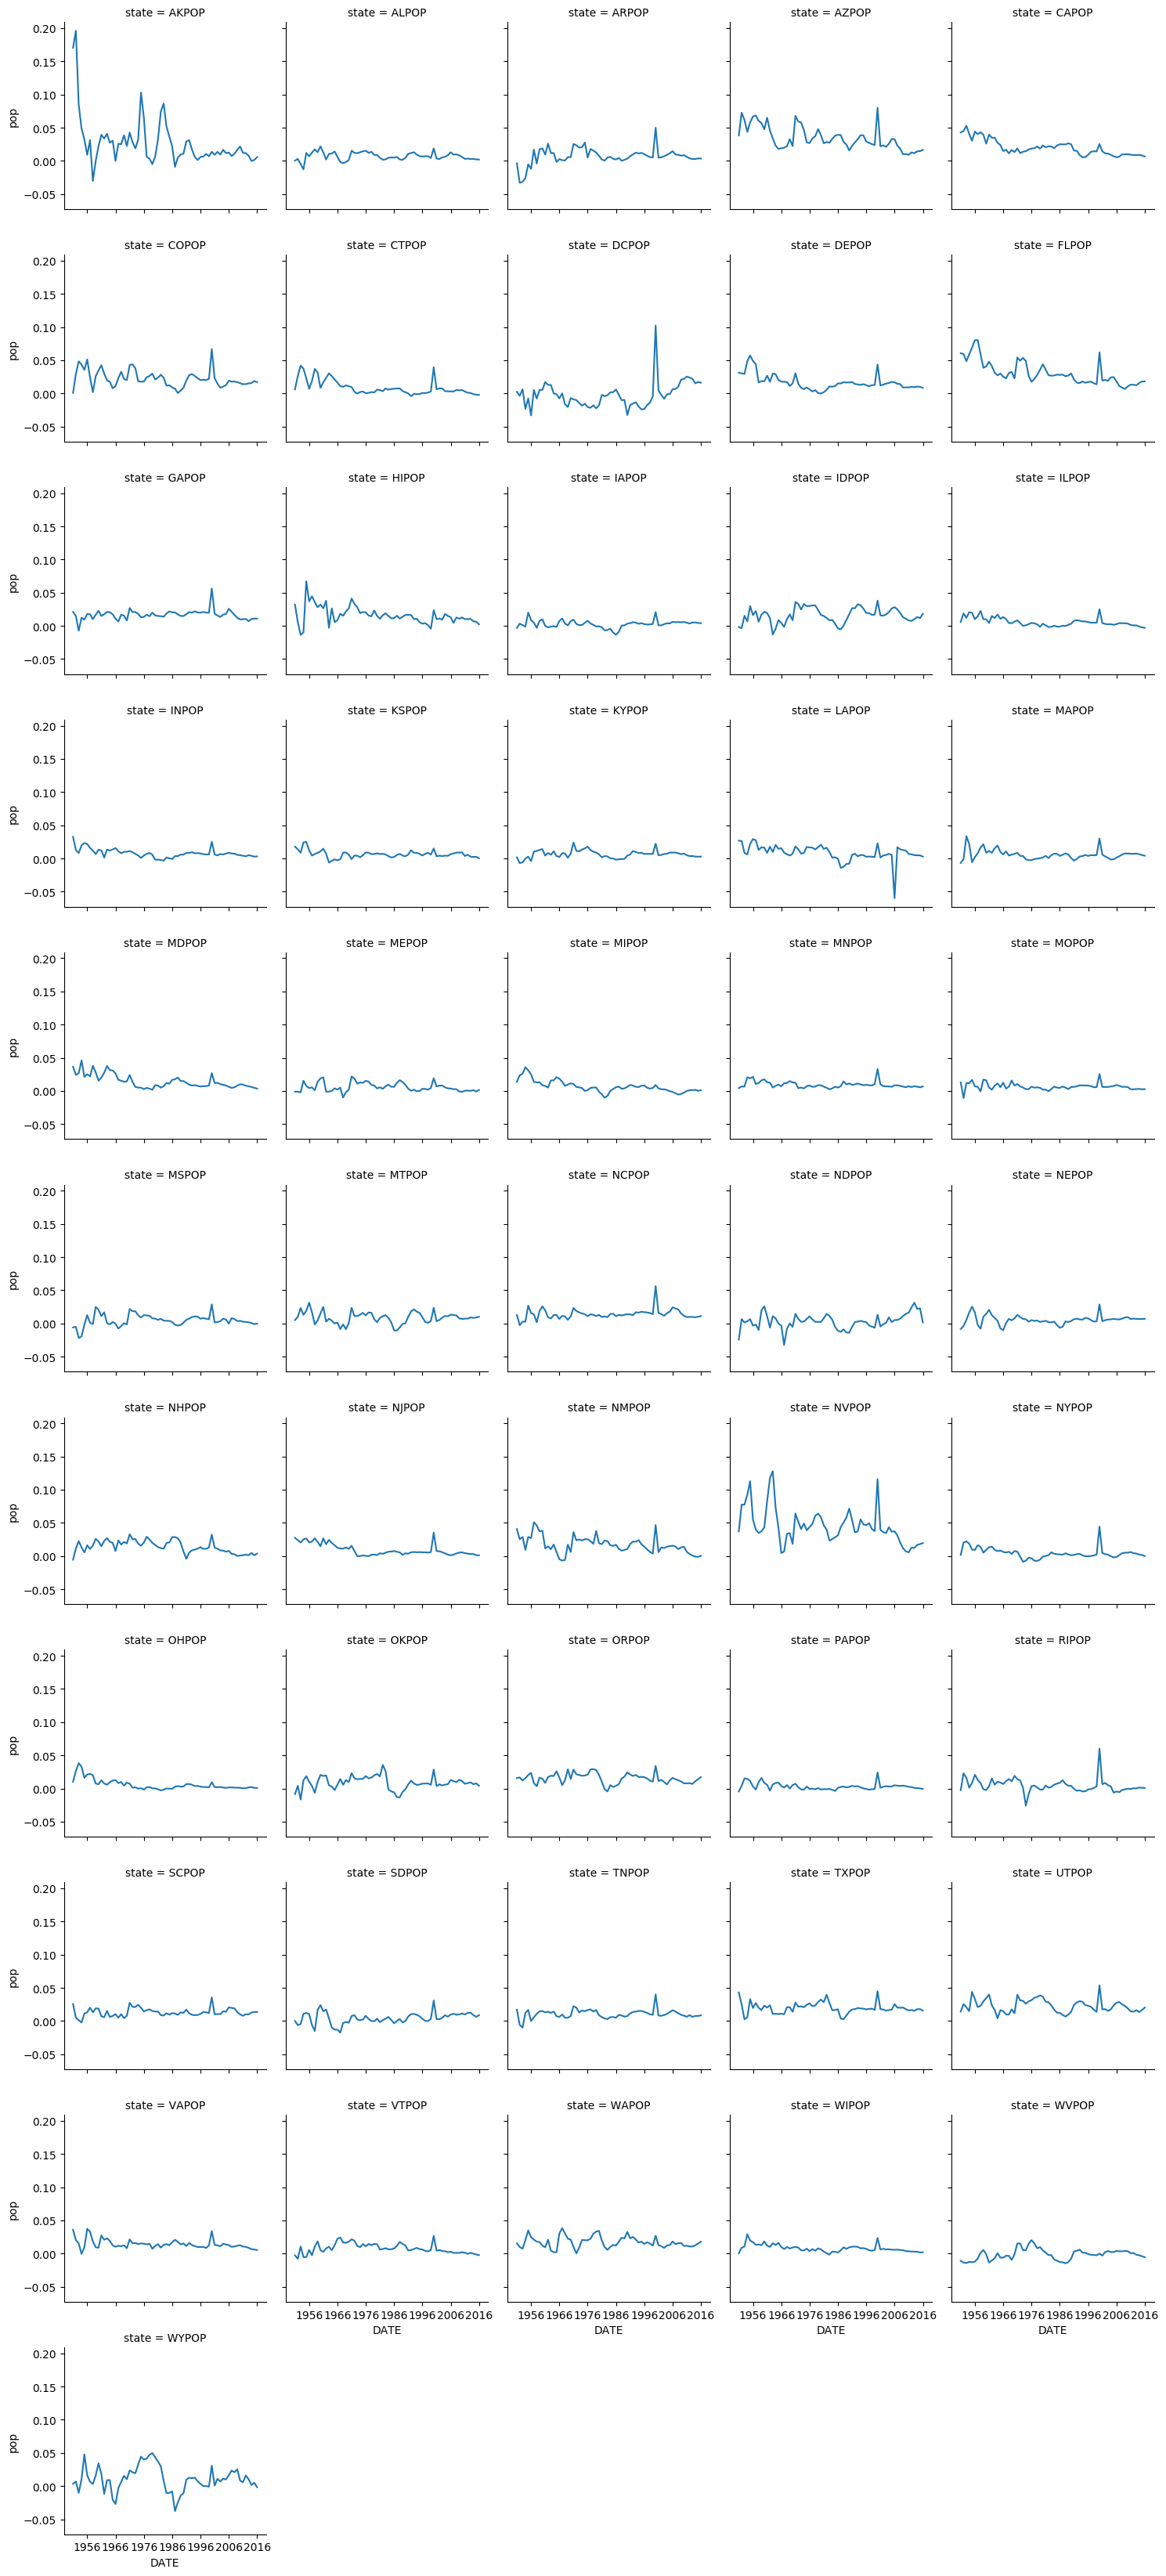

In [63]:
g = sns.FacetGrid(pop.pct_change().dropna().rename_axis("state", axis=1).stack().rename("pop").reset_index(),
                  col="state", col_wrap=5)
g.map(plt.plot, 'DATE', 'pop');

In [38]:
gdp.head()

NameError: name 'gdp' is not defined

In [66]:
pop.head()

,AKPOP,ALPOP,ARPOP,AZPOP,CAPOP,COPOP,CTPOP,DCPOP,DEPOP,FLPOP,...,SDPOP,TNPOP,TXPOP,UTPOP,VAPOP,VTPOP,WAPOP,WIPOP,WVPOP,WYPOP
DATE,,,,,,,,,,,,,,,,,,,,,
1900-01-01,NaN,1830.0,1314.0,124.0,1490.0,543.0,910.0,278.0,185.0,530.0,...,403.0,2023.0,3055.0,277.0,1858.0,344.0,523.0,2072.0,959.0,93.0
1901-01-01,NaN,1907.0,1341.0,131.0,1550.0,581.0,931.0,285.0,187.0,544.0,...,418.0,2041.0,3132.0,284.0,1887.0,347.0,583.0,2109.0,972.0,100.0
1902-01-01,NaN,1935.0,1360.0,138.0,1623.0,621.0,952.0,290.0,188.0,565.0,...,431.0,2060.0,3210.0,292.0,1894.0,349.0,651.0,2141.0,1000.0,105.0
1903-01-01,NaN,1957.0,1384.0,144.0,1702.0,652.0,972.0,295.0,190.0,587.0,...,437.0,2082.0,3291.0,299.0,1890.0,350.0,719.0,2171.0,1037.0,108.0
1904-01-01,NaN,1978.0,1419.0,151.0,1792.0,659.0,987.0,302.0,192.0,599.0,...,452.0,2086.0,3374.0,308.0,1889.0,353.0,782.0,2202.0,1064.0,111.0


In [48]:
gdp_pc = gdp.rename(columns=lambda x: x[:2]) / pop.rename(columns=lambda x: x[:2])
gdp_pc

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
DATE,,,,,,,,,,,,,,,,,,,,,
1900-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1904-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-01-01,73.478058,36.424721,34.964762,38.558643,52.974325,49.639422,63.501674,163.274975,62.173866,37.705031,...,46.964375,41.090553,50.266161,41.928621,51.546207,43.041357,53.439003,45.381587,35.509221,60.776920
2013-01-01,69.700724,36.660062,35.864848,38.303045,53.854782,50.474571,62.550282,159.497200,60.718936,38.023448,...,46.869415,41.487364,52.018007,42.266360,51.106225,42.913863,54.160832,45.845149,35.754312,60.770503
2014-01-01,67.410972,36.537721,36.249137,38.426826,55.373866,52.018563,62.236610,159.394845,63.270898,38.397654,...,46.775539,41.827669,52.992882,43.068682,50.802826,43.039376,55.001024,46.340141,36.160938,61.417787


In [93]:
%%R
library(tidyverse)


Error in library(tidyverse) : there is no package called ‘tidyverse’


/Users/taugspurger/miniconda3/envs/ia-rug/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Error in library(tidyverse) : there is no package called ‘tidyverse’

  warnings.warn(x, RRuntimeWarning)
/Users/taugspurger/miniconda3/envs/ia-rug/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: In addition: 
  warnings.warn(x, RRuntimeWarning)
/Users/taugspurger/miniconda3/envs/ia-rug/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Warning messages:

  warnings.warn(x, RRuntimeWarning)
/Users/taugspurger/miniconda3/envs/ia-rug/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 1: 
  warnings.warn(x, RRuntimeWarning)
/Users/taugspurger/miniconda3/envs/ia-rug/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: In install.packages("tidyverse") :
  warnings.warn(x, RRuntimeWarning)
/Users/taugspurger/miniconda3/envs/ia-rug/lib/python3.6/site-packages/rpy2/rin

In [35]:
%%R
library(readr)
library(dplyr)

In [36]:
%%R
gdp <- read_csv("data/gdp.csv")
pop <- read_csv("data/pop.csv")
gdp

/Users/taugspurger/miniconda3/envs/ia-rug/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Parsed with column specification:
cols(
  .default = col_integer(),
  DATE = col_date(format = "")
)

  warnings.warn(x, RRuntimeWarning)
/Users/taugspurger/miniconda3/envs/ia-rug/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: See spec(...) for full column specifications.

  warnings.warn(x, RRuntimeWarning)
/Users/taugspurger/miniconda3/envs/ia-rug/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Parsed with column specification:
cols(
  .default = col_double(),
  DATE = col_date(format = "")
)

  warnings.warn(x, RRuntimeWarning)


# A tibble: 20 x 52
         DATE AKRGSP ALRGSP ARRGSP AZRGSP  CARGSP CORGSP CTRGSP DCRGSP DERGSP
       <date>  <int>  <int>  <int>  <int>   <int>  <int>  <int>  <int>  <int>
 1 1997-01-01  37880 137143  79164 163114 1343127 175029 183342  74610  43065
 2 1998-01-01  36889 141672  80136 177319 1421713 192216 189859  75778  47120
 3 1999-01-01  36617 146666  84533 192410 1525588 207243 195476  78951  51765
 4 2000-01-01  35909 148188  85271 202215 1638988 222942 209329  79302  54253
 5 2001-01-01  37102 148824  85283 206560 1627983 226211 212395  83072  56618
 6 2002-01-01  38605 152630  87979 212195 1669677 228429 211789  85221  54701
 7 2003-01-01  38262 156970  91767 224650 1745049 229800 214003  86767  55588
 8 2004-01-01  39648 166286  96064 232105 1832792 229129 227364  90878  57741
 9 2005-01-01  40767 171723  99144 251185 1910337 238417 231573  92500  57069
10 2006-01-01  43455 174675 101028 265798 1975457 243172 237280  93801  58308
11 2007-01-01  45735 175332 100287 272417 19

In [37]:
%%R
pop

# A tibble: 117 x 52
         DATE AKPOP ALPOP ARPOP AZPOP CAPOP COPOP CTPOP DCPOP DEPOP FLPOP GAPOP
       <date> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1 1900-01-01    NA  1830  1314   124  1490   543   910   278   185   530  2220
 2 1901-01-01    NA  1907  1341   131  1550   581   931   285   187   544  2263
 3 1902-01-01    NA  1935  1360   138  1623   621   952   290   188   565  2305
 4 1903-01-01    NA  1957  1384   144  1702   652   972   295   190   587  2346
 5 1904-01-01    NA  1978  1419   151  1792   659   987   302   192   599  2387
 6 1905-01-01    NA  2012  1447   158  1893   680  1010   308   194   615  2427
 7 1906-01-01    NA  2045  1465   167  1976   707  1033   313   196   628  2466
 8 1907-01-01    NA  2058  1484   176  2054   733  1057   317   197   645  2505
 9 1908-01-01    NA  2070  1513   186  2161   757  1077   321   199   684  2543
10 1909-01-01    NA  2108  1545   196  2282   775  1097   327   201   724  2580
# ... with 107 more

In [42]:
%%R
library(reshape2)
inner_join(
    melt(gdp, id.vars="DATE"),
    melt(pop, id.vars="DATE"),
    by="DATE"
) %>% mutate(gdp_pc = value.x / value.y) %>% head

        DATE variable.x value.x variable.y   value.y    gdp_pc
1 1997-01-01     AKRGSP   37880      AKPOP   608.846 62.216061
2 1997-01-01     AKRGSP   37880      ALPOP  4320.281  8.767948
3 1997-01-01     AKRGSP   37880      ARPOP  2524.007 15.007882
4 1997-01-01     AKRGSP   37880      AZPOP  4552.207  8.321238
5 1997-01-01     AKRGSP   37880      CAPOP 32217.708  1.175751
6 1997-01-01     AKRGSP   37880      COPOP  3891.293  9.734554


In [8]:
gdp

NameError: name 'gdp' is not defined